In [44]:
import pandas as pd
pd.options.display.float_format = '{:.1f}'.format
df_upgradeData = pd.read_excel("강화데이터.xlsx")
df_upgradeData
시뮬레이션단계 = "15~20단계"
시뮬레이션횟수 = 1000
장비등급 = "전설"
시작등급 = 15
목표등급 = 20

In [45]:
data = {
    '시뮬레이션횟수':[0],
    '소모골드':[0],
    '소모보호제':[0],
    '소모주문서':[0],
    '축복주문서':[0],
    '강화횟수':[0],
    '0등급강화횟수':[0],
    '1등급강화횟수':[0],
    '2등급강화횟수':[0],
    '3등급강화횟수':[0],
    '4등급강화횟수':[0],
    '5등급강화횟수':[0],
    '6등급강화횟수':[0],
    '7등급강화횟수':[0],
    '8등급강화횟수':[0],
    '9등급강화횟수':[0],
    '10등급강화횟수':[0],
    '11등급강화횟수':[0],
    '12등급강화횟수':[0],
    '13등급강화횟수':[0],
    '14등급강화횟수':[0],
    '15등급강화횟수':[0],
    '16등급강화횟수':[0],
    '17등급강화횟수':[0],
    '18등급강화횟수':[0],
    '19등급강화횟수':[0]
}

In [46]:
df_simul = pd.DataFrame(data)
df_simulTotal = pd.DataFrame(data)

# 1. 보호제만 사용시 강화 시뮬레이터

In [47]:
import random
def 시뮬레이션(시뮬횟수):
    현재시뮬횟수 = 0
    df_simulTotal = pd.DataFrame(data)
    while 현재시뮬횟수 != int(시뮬횟수):
        df_simul = 기본강화(시작등급)
        df_simulTotal.append(df_simul, ignore_index = True)
        df_simulTotal.loc[현재시뮬횟수] = [현재시뮬횟수, df_simul.loc[0,"소모골드"],df_simul.loc[0,"소모보호제"],df_simul.loc[0,"소모주문서"],df_simul.loc[0,"축복주문서"], df_simul.loc[0,"강화횟수"], df_simul.loc[0,"0등급강화횟수"],
                                        df_simul.loc[0,"1등급강화횟수"],df_simul.loc[0,"2등급강화횟수"],df_simul.loc[0,"3등급강화횟수"], df_simul.loc[0,"4등급강화횟수"],
                                     df_simul.loc[0,"5등급강화횟수"], df_simul.loc[0,"6등급강화횟수"], df_simul.loc[0,"7등급강화횟수"], df_simul.loc[0,"8등급강화횟수"],
                                     df_simul.loc[0,"9등급강화횟수"], df_simul.loc[0,"10등급강화횟수"], df_simul.loc[0,"11등급강화횟수"], df_simul.loc[0,"12등급강화횟수"],
                                     df_simul.loc[0,"13등급강화횟수"],df_simul.loc[0,"14등급강화횟수"],df_simul.loc[0,"15등급강화횟수"], df_simul.loc[0,"16등급강화횟수"],
                                     df_simul.loc[0,"17등급강화횟수"], df_simul.loc[0,"18등급강화횟수"], df_simul.loc[0,"19등급강화횟수"]] 
        현재시뮬횟수 += 1
        
    return df_simulTotal

def 기본강화(시작등급):
    강화등급 = int(시작등급)
    강화횟수 = 0
    소모골드 = 0
    소모보호제 = 0
    소모주문서 = 0
    df_simul = pd.DataFrame(data)
    while 강화등급 != int(목표등급):
        강화횟수 +=1
        등급별강화횟수 = df_simul.loc[0, str(강화등급) + "등급강화횟수"]
        df_simul.loc[0, str(강화등급) + "등급강화횟수"] = 등급별강화횟수 + 1
        소모골드 += df_upgradeData[장비등급 + "골드"][강화등급]
        소모보호제 += df_upgradeData[장비등급 + "보호제"][강화등급]
        소모주문서 +=  df_upgradeData["소모주문서"][강화등급]
        성공여부 = random.random()
        if df_upgradeData.iloc[강화등급,1] >= 성공여부*100:
            강화등급 += 1
        else:
            if 강화등급 == 10:
                강화등급 == 10
                
    df_simul.loc[0,"소모골드"] = 소모골드
    df_simul.loc[0,"강화횟수"] = 강화횟수
    df_simul.loc[0, "소모보호제"] = 소모보호제
    df_simul.loc[0, "소모주문서"] = 소모주문서
    df_simulTotal.append(df_simul, ignore_index = True)
    
    return df_simul
    
#시뮬레이션(시뮬레이션횟수)
df_itemOnly = 시뮬레이션(시뮬레이션횟수)

# 2. 축복받은 강화주문서 사용

In [48]:
import random
def 시뮬레이션(시뮬횟수):
    현재시뮬횟수 = 0
    df_simulTotal = pd.DataFrame(data)
    while 현재시뮬횟수 != int(시뮬횟수):
        df_simul = 기본강화(시작등급)
        df_simulTotal = df_simulTotal.append(df_simul, ignore_index = True)
#         df_simulTotal.loc[현재시뮬횟수] = [현재시뮬횟수, df_simul.loc[0,"소모골드"],df_simul.loc[0,"소모보호제"],df_simul.loc[0,"소모주문서"], df_simul.loc[0,"강화횟수"], df_simul.loc[0,"0등급강화횟수"],
#                                         df_simul.loc[0,"1등급강화횟수"],df_simul.loc[0,"2등급강화횟수"],df_simul.loc[0,"3등급강화횟수"], df_simul.loc[0,"4등급강화횟수"],
#                                      df_simul.loc[0,"5등급강화횟수"], df_simul.loc[0,"6등급강화횟수"], df_simul.loc[0,"7등급강화횟수"], df_simul.loc[0,"8등급강화횟수"],
#                                      df_simul.loc[0,"9등급강화횟수"], df_simul.loc[0,"10등급강화횟수"], df_simul.loc[0,"11등급강화횟수"], df_simul.loc[0,"12등급강화횟수"],
#                                      df_simul.loc[0,"13등급강화횟수"],df_simul.loc[0,"14등급강화횟수"],df_simul.loc[0,"15등급강화횟수"], df_simul.loc[0,"16등급강화횟수"],
#                                      df_simul.loc[0,"17등급강화횟수"], df_simul.loc[0,"18등급강화횟수"], df_simul.loc[0,"19등급강화횟수"]]
        현재시뮬횟수 += 1
        
    return df_simulTotal

def 기본강화(시작등급):
    강화등급 = int(시작등급)
    강화횟수 = 0
    소모골드 = 0
    소모주문서 = 0
    df_simul = pd.DataFrame(data)
    while 강화등급 < int(목표등급):
        강화횟수 +=1
        등급별강화횟수 = df_simul.loc[0, str(강화등급) + "등급강화횟수"]
        df_simul.loc[0, str(강화등급) + "등급강화횟수"] = 등급별강화횟수 + 1
        소모골드 += df_upgradeData[장비등급 + "골드"][강화등급]
        소모주문서 +=  df_upgradeData["소모주문서"][강화등급]
        성공여부 = random.random()
        if df_upgradeData.iloc[강화등급,1] >= 성공여부*100:
            강화등급 += random.randint(1,3)
        else:
            if 강화등급 == 10:
                강화등급 == 10
            else:
                강화등급 -= 1
    df_simul.loc[0,"소모골드"] = 소모골드
    df_simul.loc[0,"강화횟수"] = 강화횟수
    df_simul.loc[0,"축복주문서"] = 소모주문서
    df_simulTotal.append(df_simul, ignore_index = True)
    
    return df_simul
    
#시뮬레이션(시뮬레이션횟수)
df_blessedScroll = 시뮬레이션(시뮬레이션횟수)
df_blessedScroll = df_blessedScroll.drop(index = 0)

# 3. 보조제 + 축복받은 주문서

In [49]:
import random
def 시뮬레이션(시뮬횟수):
    현재시뮬횟수 = 0
    df_simulTotal = pd.DataFrame(data)
    while 현재시뮬횟수 != int(시뮬횟수):
        df_simul = 기본강화(시작등급)
        df_simulTotal = df_simulTotal.append(df_simul, ignore_index = True)
        현재시뮬횟수 += 1
        
    return df_simulTotal

def 기본강화(시작등급):
    강화등급 = int(시작등급)
    강화횟수 = 0
    소모골드 = 0
    소모주문서 = 0
    소모보호제 = 0
    df_simul = pd.DataFrame(data)
    while 강화등급 < int(목표등급):
        강화횟수 +=1
        등급별강화횟수 = df_simul.loc[0, str(강화등급) + "등급강화횟수"]
        df_simul.loc[0, str(강화등급) + "등급강화횟수"] = 등급별강화횟수 + 1
        소모골드 += df_upgradeData[장비등급 + "골드"][강화등급]
        소모주문서 +=  df_upgradeData["소모주문서"][강화등급]
        소모보호제 += df_upgradeData[장비등급+"보호제"][강화등급]
        성공여부 = random.random()
        if df_upgradeData.iloc[강화등급,1] >= 성공여부*100:
            강화등급 += random.randint(1,3)
        else:
            if 강화등급 == 10:
                강화등급 == 10
           
                
    df_simul.loc[0,"소모골드"] = 소모골드
    df_simul.loc[0,"강화횟수"] = 강화횟수
    df_simul.loc[0,"축복주문서"] = 소모주문서
    df_simul.loc[0, "소모보호제"] = 소모보호제
    df_simulTotal.append(df_simul, ignore_index = True)
    
    return df_simul
    
#시뮬레이션(시뮬레이션횟수)
df_useItemAndScroll = 시뮬레이션(시뮬레이션횟수)
df_useItemAndScroll = df_useItemAndScroll.drop(index = 0)

In [50]:
df_allMean = pd.DataFrame(data)
# 강화 보호제만 사용, 축복받은강화주문서만 사용, 강화보호제+축복받은강화주문서 사용
df_allMean = df_allMean.append(pd.DataFrame(df_itemOnly.mean()).transpose(), ignore_index = True)
df_allMean = df_allMean.append(pd.DataFrame(df_blessedScroll.mean()).transpose(), ignore_index = True)
df_allMean = df_allMean.append(pd.DataFrame(df_useItemAndScroll.mean()).transpose(), ignore_index = True)
df_allMean = df_allMean.drop(index = 0)

# 판매 상품 목록

In [51]:
df_productInfo = pd.read_excel("판매상품정리.xlsx", index_col = "상품")
df_productInfo = df_productInfo.drop(columns = ["Unnamed: 0"])
df_productInfo

,골드가격,원화가격,방어구강화주문서,무기강화주문서,악세서리강화주문서,축복받은방어구강화주문서,축복받은무기강화주문서,축복받은장신구강화주문서,강화보호제,일일제한
상품,,,,,,,,,,
강화주문서상자,70000,0,2.6,0.5,0.0,0.1,0.0,0.0,0.0,20.0
고급강화주문서상자,500000,0,2.5,0.9,0.0,0.2,0.2,0.0,0.1,5.0
진귀한강화주문서상자,0,2600,2.0,0.0,0.4,0.6,0.2,0.1,0.7,0.0
강화보호제골드,150000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
축복받은무기강화주문서,0,4160,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
축복받은방어구강화주문서,0,2080,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
강화보호제원화,0,2080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
악세서리강화주문서,0,4160,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
장비강화패키지,0,33000,50.0,18.0,0.0,34.0,14.0,0.0,31.0,2.9


# 골드 구매 기준 총 소모 골드 항목 추가
골드 상점에서 구매할 수 있는 보호제 개당 150000골드로 계산했습니다

In [52]:
df_allMean["보호제골드"] = df_allMean["소모보호제"]*150000
df_allMean["총소모골드"] = df_allMean["보호제골드"]+df_allMean["소모골드"]
df_allMean

,시뮬레이션횟수,소모골드,소모보호제,소모주문서,축복주문서,강화횟수,0등급강화횟수,1등급강화횟수,2등급강화횟수,3등급강화횟수,...,12등급강화횟수,13등급강화횟수,14등급강화횟수,15등급강화횟수,16등급강화횟수,17등급강화횟수,18등급강화횟수,19등급강화횟수,보호제골드,총소모골드
1,499.5,7664730.0,1395.7,112.8,0.0,56.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.9,6.6,10.1,14.5,20.3,209348550.0,217013280.0
2,0.0,39773550.0,0.0,0.0,883.6,441.8,0.0,0.0,0.0,0.0,...,70.0,73.0,61.1,47.4,30.6,16.8,7.5,2.3,0.0,39773550.0
3,0.0,3803760.0,691.9,0.0,57.4,28.7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.1,2.5,4.0,8.2,8.9,103778550.0,107582310.0


# 원화 구매 기준 장비 종류별 총 소모 원화 항목 추가
상점에서 구매할 수 있는 나비 상품들의 평균값이 나비 1개 당 52원의 가격으로 계산했습니다

In [53]:
df_allMean["보호제원화"] = df_allMean["소모보호제"]*df_productInfo.loc["강화보호제원화", "원화가격"]
df_allMean["축복받은무기강화주문서원화"] = df_allMean["축복주문서"]*df_productInfo.loc["축복받은무기강화주문서", "원화가격"]
df_allMean["축복받은방어구강화주문서원화"] = df_allMean["축복주문서"]*df_productInfo.loc["축복받은방어구강화주문서", "원화가격"]
df_allMean["방어구총소모원화"] = df_allMean["보호제원화"] + df_allMean["축복받은방어구강화주문서원화"]
df_allMean["무기총소모원화"] = df_allMean["보호제원화"] + df_allMean["축복받은무기강화주문서원화"]
df_allMean

,시뮬레이션횟수,소모골드,소모보호제,소모주문서,축복주문서,강화횟수,0등급강화횟수,1등급강화횟수,2등급강화횟수,3등급강화횟수,...,17등급강화횟수,18등급강화횟수,19등급강화횟수,보호제골드,총소모골드,보호제원화,축복받은무기강화주문서원화,축복받은방어구강화주문서원화,방어구총소모원화,무기총소모원화
1,499.5,7664730.0,1395.7,112.8,0.0,56.4,0.0,0.0,0.0,0.0,...,10.1,14.5,20.3,209348550.0,217013280.0,2902966.6,0.0,0.0,2902966.6,2902966.6
2,0.0,39773550.0,0.0,0.0,883.6,441.8,0.0,0.0,0.0,0.0,...,16.8,7.5,2.3,0.0,39773550.0,0.0,3675776.0,1837888.0,1837888.0,3675776.0
3,0.0,3803760.0,691.9,0.0,57.4,28.7,0.0,0.0,0.0,0.0,...,4.0,8.2,8.9,103778550.0,107582310.0,1439062.6,238625.9,119313.0,1558375.5,1677688.5


# 유저 유형 데이터 생성
상점에서 골드로 살 수 있는 상품을 모두 구매한 유저와, 골드 상품 + 강화 보호제 패키지 + 장비 강화 패키지를 구매한 유저의 데이터를 생성했습니다

In [54]:
#유저 유형별 데이터 생성
userProductData = {
    '방어구강화주문서':[0,0],
    '무기강화주문서':[0,0],
    '축복받은방어구강화주문서':[0,0],
    '축복받은무기강화주문서':[0,0],
    '강화보호제':[0,0],
    '골드소모':[0,0],
    '원화소모':[0,0]
}
df_userProductData = pd.DataFrame(userProductData, index = ['원화패키지+골드상품구매', '골드상품만구매'])
df_userProductData.loc["원화패키지+골드상품구매", "방어구강화주문서"] = df_productInfo.loc["강화주문서상자", "방어구강화주문서"]*df_productInfo.loc["강화주문서상자", "일일제한"]+df_productInfo.loc["고급강화주문서상자", "방어구강화주문서"]*df_productInfo.loc["고급강화주문서상자", "일일제한"]+df_productInfo.loc["강화보호제골드", "방어구강화주문서"]*df_productInfo.loc["강화보호제골드", "일일제한"]+df_productInfo.loc["장비강화패키지", "방어구강화주문서"]*df_productInfo.loc["장비강화패키지", "일일제한"]+df_productInfo.loc["강화보호제패키지", "방어구강화주문서"]*df_productInfo.loc["강화보호제패키지", "일일제한"]
df_userProductData.loc["원화패키지+골드상품구매", "무기강화주문서"] = df_productInfo.loc["강화주문서상자", "무기강화주문서"]*df_productInfo.loc["강화주문서상자", "일일제한"]+df_productInfo.loc["고급강화주문서상자", "무기강화주문서"]*df_productInfo.loc["고급강화주문서상자", "일일제한"]+df_productInfo.loc["강화보호제골드", "무기강화주문서"]*df_productInfo.loc["강화보호제골드", "일일제한"]+df_productInfo.loc["장비강화패키지", "무기강화주문서"]*df_productInfo.loc["장비강화패키지", "일일제한"]+df_productInfo.loc["강화보호제패키지", "무기강화주문서"]*df_productInfo.loc["강화보호제패키지", "일일제한"]
df_userProductData.loc["원화패키지+골드상품구매", "축복받은방어구강화주문서"] = df_productInfo.loc["강화주문서상자", "축복받은방어구강화주문서"]*df_productInfo.loc["강화주문서상자", "일일제한"]+df_productInfo.loc["고급강화주문서상자", "축복받은방어구강화주문서"]*df_productInfo.loc["고급강화주문서상자", "일일제한"]+df_productInfo.loc["강화보호제골드", "축복받은방어구강화주문서"]*df_productInfo.loc["강화보호제골드", "일일제한"]+df_productInfo.loc["장비강화패키지", "축복받은방어구강화주문서"]*df_productInfo.loc["장비강화패키지", "일일제한"]+df_productInfo.loc["강화보호제패키지", "축복받은방어구강화주문서"]*df_productInfo.loc["강화보호제패키지", "일일제한"]
df_userProductData.loc["원화패키지+골드상품구매", "축복받은무기강화주문서"] = df_productInfo.loc["강화주문서상자", "축복받은무기강화주문서"]*df_productInfo.loc["강화주문서상자", "일일제한"]+df_productInfo.loc["고급강화주문서상자", "축복받은무기강화주문서"]*df_productInfo.loc["고급강화주문서상자", "일일제한"]+df_productInfo.loc["강화보호제골드", "축복받은무기강화주문서"]*df_productInfo.loc["강화보호제골드", "일일제한"]+df_productInfo.loc["장비강화패키지", "축복받은무기강화주문서"]*df_productInfo.loc["장비강화패키지", "일일제한"]+df_productInfo.loc["강화보호제패키지", "축복받은무기강화주문서"]*df_productInfo.loc["강화보호제패키지", "일일제한"]
df_userProductData.loc["원화패키지+골드상품구매", "강화보호제"] = df_productInfo.loc["강화주문서상자", "강화보호제"]*df_productInfo.loc["강화주문서상자", "일일제한"]+df_productInfo.loc["고급강화주문서상자", "강화보호제"]*df_productInfo.loc["고급강화주문서상자", "일일제한"]+df_productInfo.loc["강화보호제골드", "강화보호제"]*df_productInfo.loc["강화보호제골드", "일일제한"]+df_productInfo.loc["장비강화패키지", "강화보호제"]*df_productInfo.loc["장비강화패키지", "일일제한"]+df_productInfo.loc["강화보호제패키지", "강화보호제"]*df_productInfo.loc["강화보호제패키지", "일일제한"]
df_userProductData.loc["원화패키지+골드상품구매", "골드소모"] = df_productInfo.loc["강화주문서상자", "골드가격"]*df_productInfo.loc["강화주문서상자", "일일제한"]+df_productInfo.loc["고급강화주문서상자", "골드가격"]*df_productInfo.loc["고급강화주문서상자", "일일제한"]+df_productInfo.loc["강화보호제골드", "골드가격"]*df_productInfo.loc["강화보호제골드", "일일제한"]
df_userProductData.loc["원화패키지+골드상품구매", "원화소모"] = df_productInfo.loc["장비강화패키지", "원화가격"]*df_productInfo.loc["장비강화패키지", "일일제한"]+df_productInfo.loc["강화보호제패키지", "원화가격"]*df_productInfo.loc["강화보호제패키지", "일일제한"]
df_userProductData.loc["골드상품만구매", "방어구강화주문서"] = df_productInfo.loc["강화주문서상자", "방어구강화주문서"]*df_productInfo.loc["강화주문서상자", "일일제한"]+df_productInfo.loc["고급강화주문서상자", "방어구강화주문서"]*df_productInfo.loc["고급강화주문서상자", "일일제한"]+df_productInfo.loc["강화보호제골드", "방어구강화주문서"]*df_productInfo.loc["강화보호제골드", "일일제한"]
df_userProductData.loc["골드상품만구매", "무기강화주문서"] = df_productInfo.loc["강화주문서상자", "무기강화주문서"]*df_productInfo.loc["강화주문서상자", "일일제한"]+df_productInfo.loc["고급강화주문서상자", "무기강화주문서"]*df_productInfo.loc["고급강화주문서상자", "일일제한"]+df_productInfo.loc["강화보호제골드", "무기강화주문서"]*df_productInfo.loc["강화보호제골드", "일일제한"]
df_userProductData.loc["골드상품만구매", "축복받은방어구강화주문서"] = df_productInfo.loc["강화주문서상자", "축복받은방어구강화주문서"]*df_productInfo.loc["강화주문서상자", "일일제한"]+df_productInfo.loc["고급강화주문서상자", "축복받은방어구강화주문서"]*df_productInfo.loc["고급강화주문서상자", "일일제한"]+df_productInfo.loc["강화보호제골드", "축복받은방어구강화주문서"]*df_productInfo.loc["강화보호제골드", "일일제한"]
df_userProductData.loc["골드상품만구매", "축복받은무기강화주문서"] = df_productInfo.loc["강화주문서상자", "축복받은무기강화주문서"]*df_productInfo.loc["강화주문서상자", "일일제한"]+df_productInfo.loc["고급강화주문서상자", "축복받은무기강화주문서"]*df_productInfo.loc["고급강화주문서상자", "일일제한"]+df_productInfo.loc["강화보호제골드", "축복받은무기강화주문서"]*df_productInfo.loc["강화보호제골드", "일일제한"]
df_userProductData.loc["골드상품만구매", "강화보호제"] = df_productInfo.loc["강화주문서상자", "강화보호제"]*df_productInfo.loc["강화주문서상자", "일일제한"]+df_productInfo.loc["고급강화주문서상자", "강화보호제"]*df_productInfo.loc["고급강화주문서상자", "일일제한"]+df_productInfo.loc["강화보호제골드", "강화보호제"]*df_productInfo.loc["강화보호제골드", "일일제한"]
df_userProductData.loc["골드상품만구매", "골드소모"] = df_productInfo.loc["강화주문서상자", "골드가격"]*df_productInfo.loc["강화주문서상자", "일일제한"]+df_productInfo.loc["고급강화주문서상자", "골드가격"]*df_productInfo.loc["고급강화주문서상자", "일일제한"]+df_productInfo.loc["강화보호제골드", "골드가격"]*df_productInfo.loc["강화보호제골드", "일일제한"]
df_userProductData

,방어구강화주문서,무기강화주문서,축복받은방어구강화주문서,축복받은무기강화주문서,강화보호제,골드소모,원화소모
원화패키지+골드상품구매,207.4,65.1,100.5,41.6,163.8,4350000,117857.1
골드상품만구매,64.5,13.7,3.4,1.6,3.9,4350000,0.0


In [55]:
#골드상품구매 유형생성
armorTimeData = {
    "방어구강화주문서필요일수":[0,0,0],
    "축복받은방어구강화주문서필요일수":[0,0,0],
    "보호제필요일수":[0,0,0]
}
df_goldOnlyArmorDuration = pd.DataFrame(armorTimeData, index = ["보호제만사용",
                                                              "축복받은강화주문서사용","보호제+축복받은강화주문서"])
df_goldOnlyArmorDuration.iloc[0, 0] =  df_allMean.loc[1,"소모주문서"]/df_userProductData.iloc[1,0] # 2: 보호제만 사용
df_goldOnlyArmorDuration.iloc[0, 2] =  df_allMean.loc[1,"소모보호제"]/df_userProductData.iloc[1,4]
df_goldOnlyArmorDuration.iloc[1, 1] =  df_allMean.loc[2,"축복주문서"]/df_userProductData.iloc[1,2] # 3:축복받은 주문서만 사용
df_goldOnlyArmorDuration.iloc[2, 1] =  df_allMean.loc[3,"축복주문서"]/df_userProductData.iloc[1,2] # 4: 보호제 + 축복받은 강화주문서
df_goldOnlyArmorDuration.iloc[2, 2] =  df_allMean.loc[3,"소모보호제"]/df_userProductData.iloc[1,4]
maxGoldValue = df_goldOnlyArmorDuration.max(axis =1)
df_goldOnlyArmorDuration["소모골드"] = maxGoldValue*df_userProductData.loc["골드상품만구매","골드소모"]


weapTimeData = {
    "무기강화주문서필요일수":[0,0,0],
    "축복받은무기강화주문서필요일수":[0,0,0],
    "보호제필요일수":[0,0,0]
}
df_goldOnlyWeapDuration = pd.DataFrame(weapTimeData, index = ["보호제만사용",
                                                              "축복받은강화주문서사용","보호제+축복받은강화주문서"])
df_goldOnlyWeapDuration.iloc[0, 0] =  df_allMean.loc[1,"소모주문서"]/df_userProductData.iloc[1,1] # 2: 보호제만 사용
df_goldOnlyWeapDuration.iloc[0, 2] =  df_allMean.loc[1,"소모보호제"]/df_userProductData.iloc[1,4]
df_goldOnlyWeapDuration.iloc[1, 1] =  df_allMean.loc[2,"축복주문서"]/df_userProductData.iloc[1,3] # 3:축복받은 주문서만 사용
df_goldOnlyWeapDuration.iloc[2, 1] =  df_allMean.loc[3,"축복주문서"]/df_userProductData.iloc[1,3] # 4: 보호제 + 축복받은 강화주문서
df_goldOnlyWeapDuration.iloc[2, 2] =  df_allMean.loc[3,"소모보호제"]/df_userProductData.iloc[1,4]
maxGoldValue = df_goldOnlyWeapDuration.max(axis =1)
df_goldOnlyWeapDuration["소모골드"] = maxGoldValue*df_userProductData.loc["골드상품만구매","골드소모"]
df_goldOnlyWeapDuration

,무기강화주문서필요일수,축복받은무기강화주문서필요일수,보호제필요일수,소모골드
보호제만사용,8.2,0.0,362.5,1576911155.8
축복받은강화주문서사용,0.0,552.2,0.0,2402287500.0
보호제+축복받은강화주문서,0.0,35.9,179.7,781708558.4


In [56]:
#골드상품+패키지구매 유형생성
armorTimeData = {
    "방어구강화주문서필요일수":[0,0,0],
    "축복받은방어구강화주문서필요일수":[0,0,0],
    "보호제필요일수":[0,0,0]
}
df_goldPackageArmorDuration = pd.DataFrame(armorTimeData, index = ["보호제만사용",
                                                              "축복받은강화주문서사용","보호제+축복받은강화주문서"])
df_goldPackageArmorDuration.iloc[0, 0] =  df_allMean.loc[1,"소모주문서"]/df_userProductData.iloc[0,0] # 2: 보호제만 사용
df_goldPackageArmorDuration.iloc[0, 2] =  df_allMean.loc[1,"소모보호제"]/df_userProductData.iloc[0,4]
df_goldPackageArmorDuration.iloc[1, 1] =  df_allMean.loc[2,"축복주문서"]/df_userProductData.iloc[0,2] # 3:축복받은 주문서만 사용
df_goldPackageArmorDuration.iloc[2, 1] =  df_allMean.loc[3,"축복주문서"]/df_userProductData.iloc[0,2] # 4: 보호제 + 축복받은 강화주문서
df_goldPackageArmorDuration.iloc[2, 2] =  df_allMean.loc[3,"소모보호제"]/df_userProductData.iloc[0,4]
maxGoldValue = df_goldPackageArmorDuration.max(axis =1)
df_goldPackageArmorDuration["소모골드"] = maxGoldValue*df_userProductData.loc["원화패키지+골드상품구매","골드소모"]
df_goldPackageArmorDuration["소모원화"] = maxGoldValue*df_userProductData.loc["원화패키지+골드상품구매","원화소모"]


weapTimeData = {
    "무기강화주문서필요일수":[0,0,0],
    "축복받은무기강화주문서필요일수":[0,0,0],
    "보호제필요일수":[0,0,0]
}
df_goldPackageWeapDuration = pd.DataFrame(weapTimeData, index = ["보호제만사용",
                                                              "축복받은강화주문서사용","보호제+축복받은강화주문서"])
df_goldPackageWeapDuration.iloc[0, 0] =  df_allMean.loc[1,"소모주문서"]/df_userProductData.iloc[0,1] # 2: 보호제만 사용
df_goldPackageWeapDuration.iloc[0, 2] =  df_allMean.loc[1,"소모보호제"]/df_userProductData.iloc[0,4]
df_goldPackageWeapDuration.iloc[1, 1] =  df_allMean.loc[2,"축복주문서"]/df_userProductData.iloc[0,3] # 3:축복받은 주문서만 사용
df_goldPackageWeapDuration.iloc[2, 1] =  df_allMean.loc[3,"축복주문서"]/df_userProductData.iloc[0,3] # 4: 보호제 + 축복받은 강화주문서
df_goldPackageWeapDuration.iloc[2, 2] =  df_allMean.loc[3,"소모보호제"]/df_userProductData.iloc[0,4]
maxGoldValue = df_goldPackageWeapDuration.max(axis =1)
df_goldPackageWeapDuration["소모골드"] = maxGoldValue*df_userProductData.loc["원화패키지+골드상품구매","골드소모"]
df_goldPackageWeapDuration["소모원화"] = maxGoldValue*df_userProductData.loc["원화패키지+골드상품구매","원화소모"]
df_goldPackageArmorDuration

,방어구강화주문서필요일수,축복받은방어구강화주문서필요일수,보호제필요일수,소모골드,소모원화
보호제만사용,0.5,0.0,8.5,37052840.7,1003894.7
축복받은강화주문서사용,0.0,8.8,0.0,38229070.8,1035763.0
보호제+축복받은강화주문서,0.0,0.6,4.2,18367885.0,497652.1


# 강화 관련 그래프
전설 등급 장비 강화 기준 강화 유형 별 총 강화 시도 횟수, 단계별 강화 시도 횟수, 강화 유형별 총 소모 보호제, 강화 유형별 총 소모 골드, 강화 유형별 방어구 강화 시 소모 원화,강화 유형별 무기 강화 시 소모 원화, 유저 유형 별 달성 시간

In [57]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 15 # 글자 크기
plt.rcParams['axes.unicode_minus']= False # 한글 폰트 사용 시 마이너스 글자가 깨지는 현상을 해결

# 강화 유형별 총 강화 시도 횟수

[Text(0, 0, '56.4'), Text(0, 0, '441.8'), Text(0, 0, '28.681')]

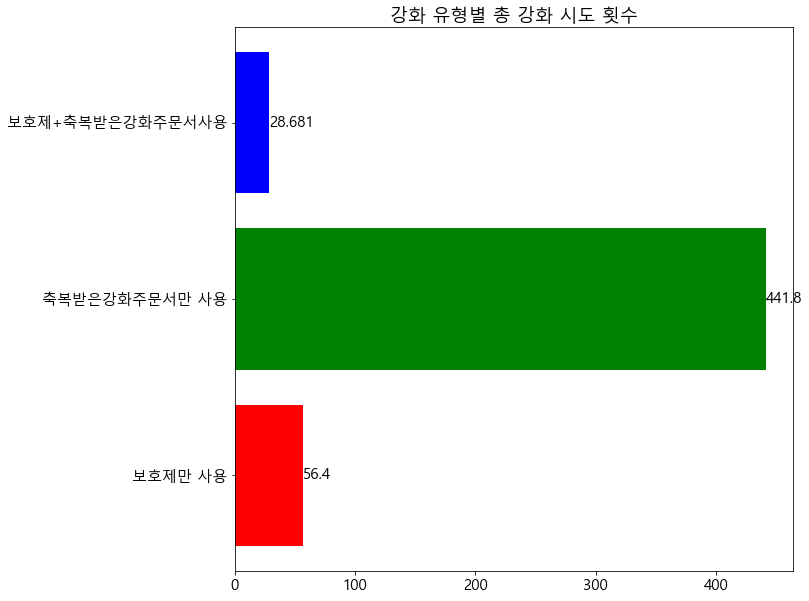

In [58]:
import numpy as np
시뮬레이션유형 = ["보호제만 사용", "축복받은강화주문서만 사용", "보호제+축복받은강화주문서사용"]
colors = ['r', 'g', 'b', "m"]
plt.figure(figsize = (10,10))
ax1 = plt.barh(시뮬레이션유형, df_allMean["강화횟수"] , color = colors)

plt.title("강화 유형별 총 강화 시도 횟수")
plt.bar_label(ax1)

# 강화 유형별 총 소모 보호제
강화 보호제만 사용했을 때, 강화 보호제와 축복받은 강화 주문서를 함께 사용했을 때 소모한 보호제의 개수 그래프입니다

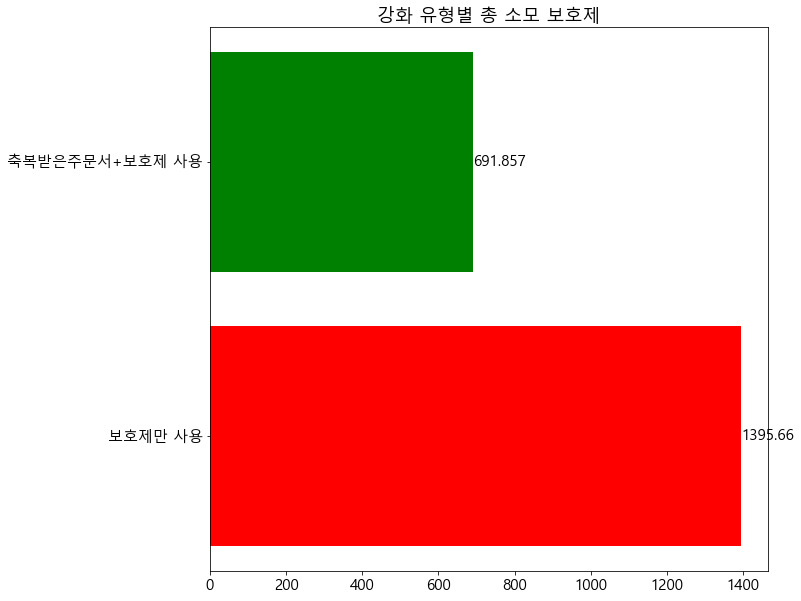

In [59]:
plt.figure(figsize = (10,10))
보호제유형 = ["보호제만 사용", "축복받은주문서+보호제 사용"]
df_itemMean = df_allMean[df_allMean["소모보호제"] > 0]
ax2 = plt.barh(보호제유형,df_itemMean["소모보호제"], color = colors)
plt.title("강화 유형별 총 소모 보호제")
plt.bar_label(ax2)
plt.savefig(f"{시뮬레이션단계}강화유형별총소모보호제.png", dpi = 200)

# 강화 유형별 총 소모 골드
골드 상점에서 골드로 강화 보호제를 구매했다고 가정했을 때 소모 골드량입니다

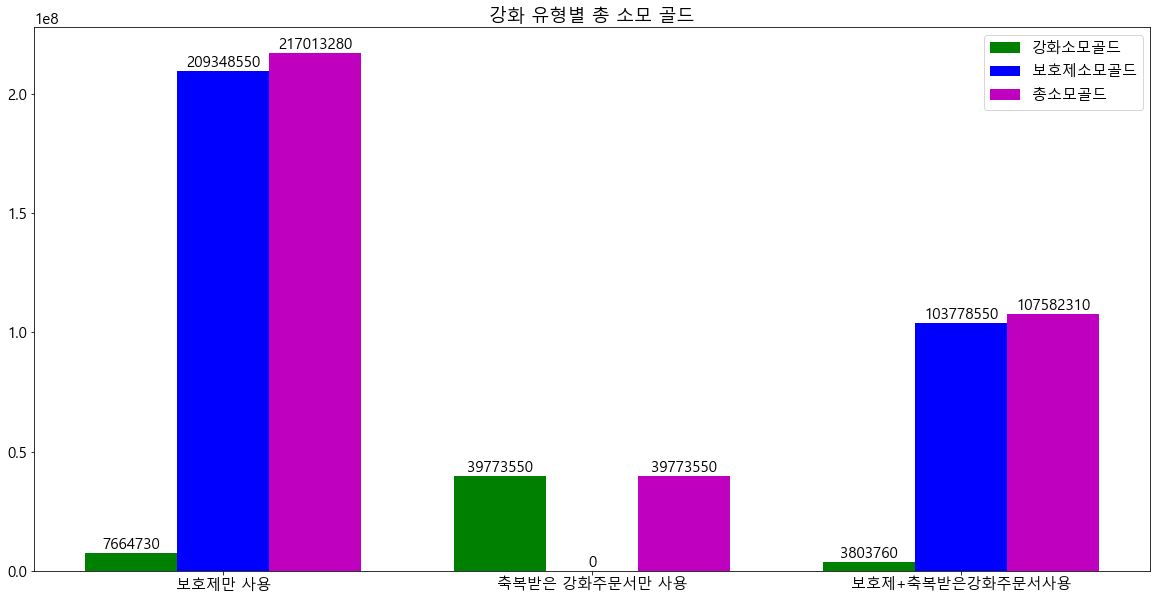

In [60]:
fig, ax = plt.subplots(figsize = (20,10))
시뮬레이션유형 = np.arange(3)
colors = ['g', 'b', "m"]
w =0.25
df_allMean["강화유형"] = ["보호제만 사용", "축복받은 강화주문서만 사용", "보호제+축복받은강화주문서사용"]
p1 = ax.bar(시뮬레이션유형-w,df_allMean["소모골드"], width = w, color = 'g', label = "강화소모골드")
p2 = ax.bar(시뮬레이션유형,df_allMean["보호제골드"], width = w, color = 'b', label = "보호제소모골드")
p3 = ax.bar(시뮬레이션유형+w,df_allMean["총소모골드"], width = w, color = 'm', label = "총소모골드")
ax.set_title("강화 유형별 총 소모 골드")
ax.bar_label(p1, fmt = '%.f')
ax.bar_label(p2, fmt = '%.f')
ax.bar_label(p3, fmt = '%.f')
ax.set_xticks(시뮬레이션유형)
ax.set_xticklabels(df_allMean["강화유형"])
ax.legend()

# 강화 유형별 단계 별 강화 시도 횟수

Text(0.5, 0.98, '15~20단계강화 유형별 강화 횟수')

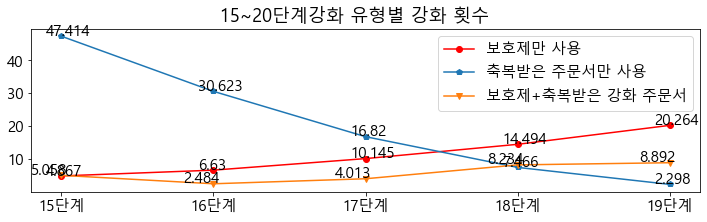

In [61]:

fig = plt.figure(figsize = (12,3))
plt.suptitle(f"{시뮬레이션단계}강화 유형별 강화 횟수")
강화등급 = ["15단계","16단계","17단계","18단계","19단계"]
ax = fig.add_subplot()
# basicSimulPlot = ax.plot(강화등급, df_basicSimul.mean()[6:16],label = "기본 강화", marker = 'o')
# basicSimulPlot = basicSimulPlot[0]
# for upgradeCount in list(basicSimulPlot.get_xydata()):
#     ax.text(x = upgradeCount[0]-0.1, y = upgradeCount[1]+0.1, s = upgradeCount[1])


itemOnlyPlot = ax.plot(강화등급, df_itemOnly.mean()[21:26],label = "보호제만 사용", marker = 'o', color = 'r')
itemOnlyPlot = itemOnlyPlot[0]
for upgradeCount in list(itemOnlyPlot.get_xydata()):
    ax.text(x = upgradeCount[0]-0.1, y = upgradeCount[1]+0.1, s = upgradeCount[1])
    
scrollOnlyPlot = ax.plot(강화등급, df_blessedScroll.mean()[21:26],label = "축복받은 주문서만 사용", marker = 'p')
scrollOnlyPlot = scrollOnlyPlot[0]
for upgradeCount in list(scrollOnlyPlot.get_xydata()):
    ax.text(x = upgradeCount[0]-0.1, y = upgradeCount[1]+0.1, s = upgradeCount[1])

itemAndScrollPlot = ax.plot(강화등급, df_useItemAndScroll.mean()[21:26],label = "보호제+축복받은 강화 주문서", marker = 'v')
itemAndScrollPlot = itemAndScrollPlot[0]
for upgradeCount in list(itemAndScrollPlot.get_xydata()):
    ax.text(x = upgradeCount[0]-0.2, y = upgradeCount[1]+0.2, s = upgradeCount[1])

ax.legend()
plt.suptitle(f"{시뮬레이션단계}강화 유형별 강화 횟수")

# 방어구 강화시 소모 원화
나비로 모든 강화 보호제와 축복받은 강화주문서를 구매한다고 가정해 방어구 강화에 필요한 원화를 계산한 그래프입니다

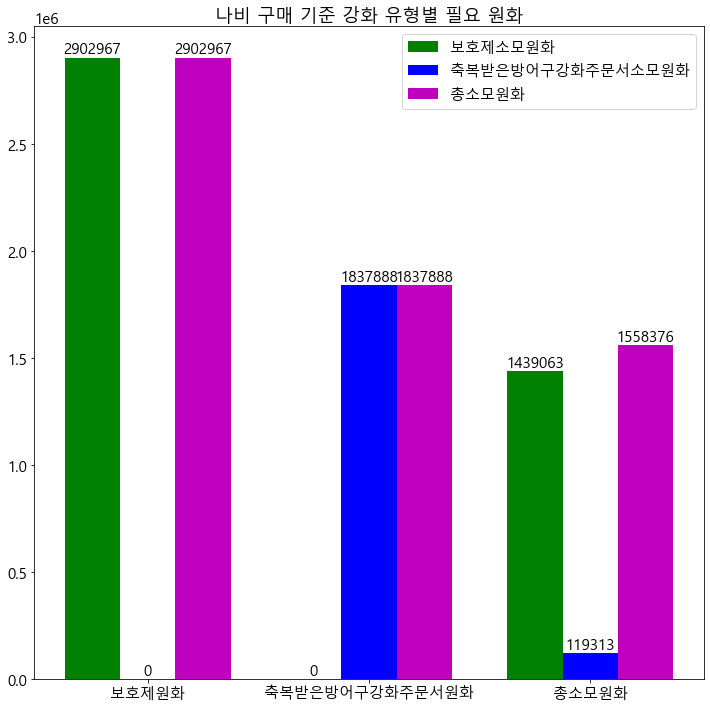

In [62]:
fig, ax = plt.subplots(figsize = (12,12))
시뮬레이션유형 = np.arange(3)
원화강화유형 = ["보호제원화", "축복받은방어구강화주문서원화", "총소모원화"]
colors = ['g', 'b', "m"]
w =0.25
p1 = ax.bar(시뮬레이션유형-w,df_allMean["보호제원화"], width = w, color = 'g', label = "보호제소모원화")
p2 = ax.bar(시뮬레이션유형,df_allMean["축복받은방어구강화주문서원화"], width = w, color = 'b', label = "축복받은방어구강화주문서소모원화")
p3 = ax.bar(시뮬레이션유형+w,df_allMean["방어구총소모원화"], width = w, color = 'm', label = "총소모원화")
ax.set_title("나비 구매 기준 강화 유형별 필요 원화")
ax.bar_label(p1, fmt = '%.f')
ax.bar_label(p2, fmt = '%.f')
ax.bar_label(p3, fmt = '%.f')
plt.xticks(시뮬레이션유형, 원화강화유형)
ax.legend()

# 무기 강화 시 소모 원화

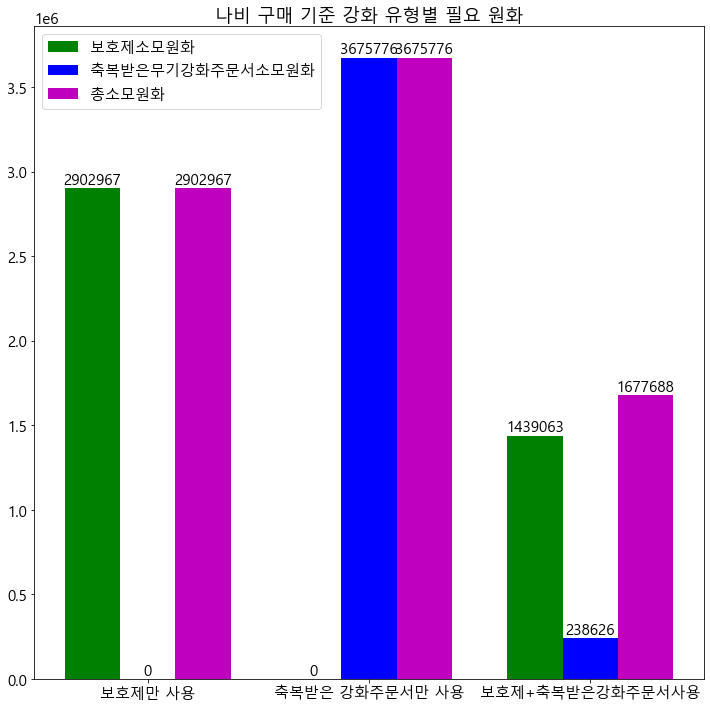

In [63]:
fig, ax = plt.subplots(figsize = (12,12))
시뮬레이션유형 = np.arange(3)
colors = ['g', 'b', "m"]
w =0.25
p1 = ax.bar(시뮬레이션유형-w,df_allMean["보호제원화"], width = w, color = 'g', label = "보호제소모원화")
p2 = ax.bar(시뮬레이션유형,df_allMean["축복받은무기강화주문서원화"], width = w, color = 'b', label = "축복받은무기강화주문서소모원화")
p3 = ax.bar(시뮬레이션유형+w,df_allMean["무기총소모원화"], width = w, color = 'm', label = "총소모원화")
ax.set_title("나비 구매 기준 강화 유형별 필요 원화")
ax.bar_label(p1, fmt = '%.f')
ax.bar_label(p2, fmt = '%.f')
ax.bar_label(p3, fmt = '%.f')
ax.set_xticks(시뮬레이션유형)
ax.set_xticklabels(df_allMean["강화유형"][0:3])
ax.legend()

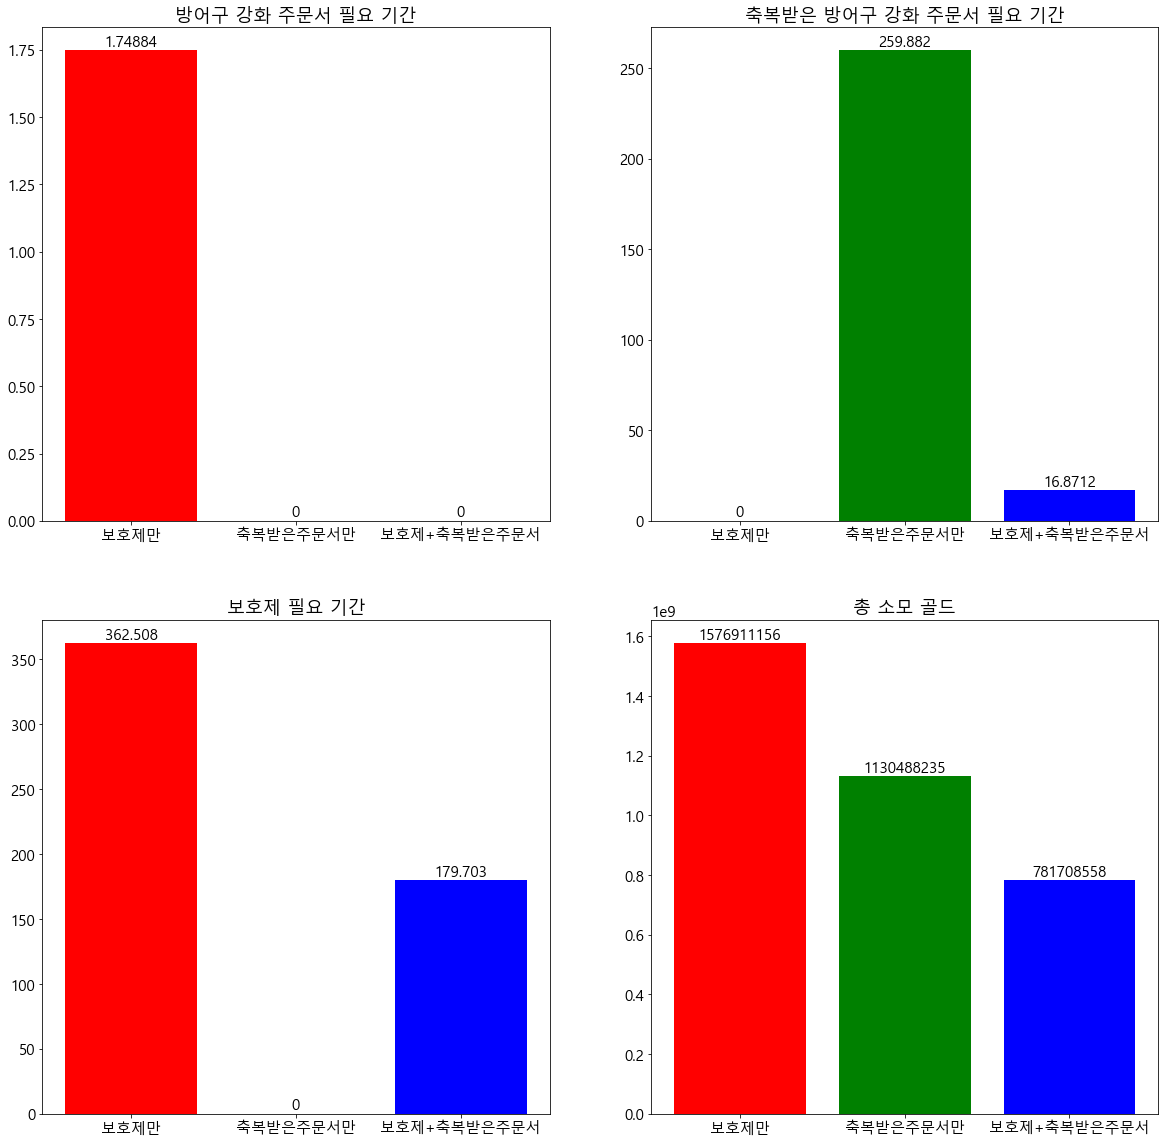

In [64]:
fig, axs = plt.subplots(2,2,figsize = (20,20))
시뮬레이션유형 = np.arange(3)
colors = ['r', 'g', 'b', 'm']
강화유형 = ["보호제만","축복받은주문서만","보호제+축복받은주문서"]
p1 = axs[0,0].bar(강화유형, df_goldOnlyArmorDuration["방어구강화주문서필요일수"], color = colors)
axs[0,0].title.set_text("방어구 강화 주문서 필요 기간")
axs[0,0].bar_label(p1)
axs[0,0].set_xticks(시뮬레이션유형)
axs[0,0].set_xticklabels(강화유형)
p2 = axs[0,1].bar(강화유형, df_goldOnlyArmorDuration["축복받은방어구강화주문서필요일수"], color = colors)
axs[0,1].bar_label(p2)
axs[0,1].title.set_text("축복받은 방어구 강화 주문서 필요 기간")
p3 = axs[1,0].bar(강화유형, df_goldOnlyArmorDuration["보호제필요일수"], color = colors)
axs[1,0].bar_label(p3)
axs[1,0].title.set_text("보호제 필요 기간")
p4 = axs[1,1].bar(강화유형, df_goldOnlyArmorDuration["소모골드"], color = colors)
axs[1,1].bar_label(p4, fmt = "%.f")
axs[1,1].title.set_text("총 소모 골드")

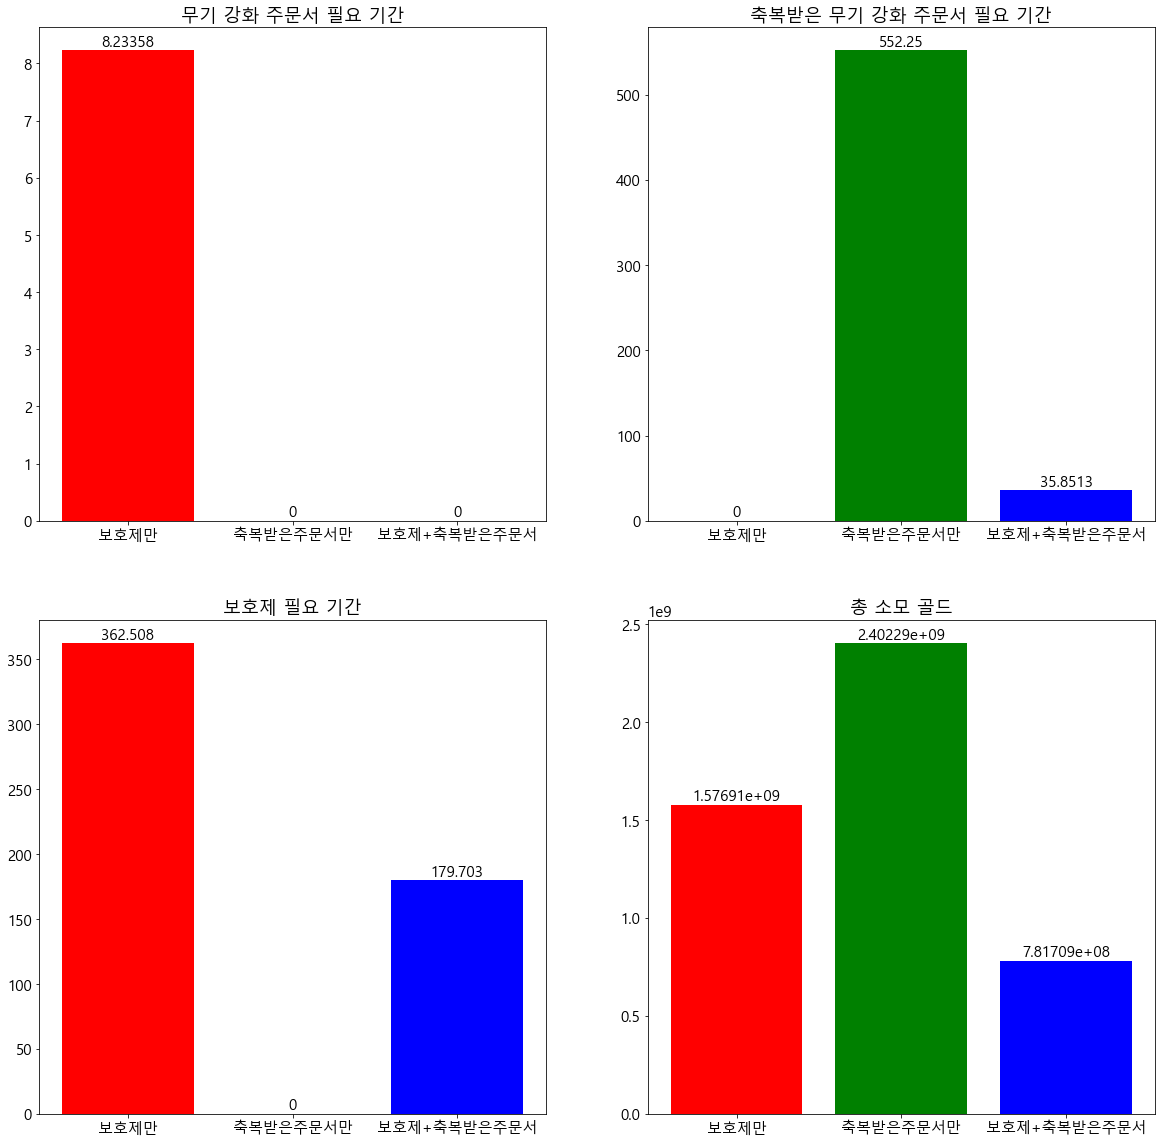

In [65]:
fig, axs = plt.subplots(2,2,figsize = (20,20))
시뮬레이션유형 = np.arange(3)
colors = ['r', 'g', 'b', 'm']
강화유형 = ["보호제만","축복받은주문서만","보호제+축복받은주문서"]
p1 = axs[0,0].bar(강화유형, df_goldOnlyWeapDuration["무기강화주문서필요일수"], color = colors)
axs[0,0].title.set_text("무기 강화 주문서 필요 기간")
axs[0,0].bar_label(p1)
axs[0,0].set_xticks(시뮬레이션유형)
axs[0,0].set_xticklabels(강화유형)
p2 = axs[0,1].bar(강화유형, df_goldOnlyWeapDuration["축복받은무기강화주문서필요일수"], color = colors)
axs[0,1].bar_label(p2)
axs[0,1].title.set_text("축복받은 무기 강화 주문서 필요 기간")
p3 = axs[1,0].bar(강화유형, df_goldOnlyWeapDuration["보호제필요일수"], color = colors)
axs[1,0].bar_label(p3)
axs[1,0].title.set_text("보호제 필요 기간")
p4 = axs[1,1].bar(강화유형, df_goldOnlyWeapDuration["소모골드"], color = colors)
axs[1,1].bar_label(p4)
axs[1,1].title.set_text("총 소모 골드")

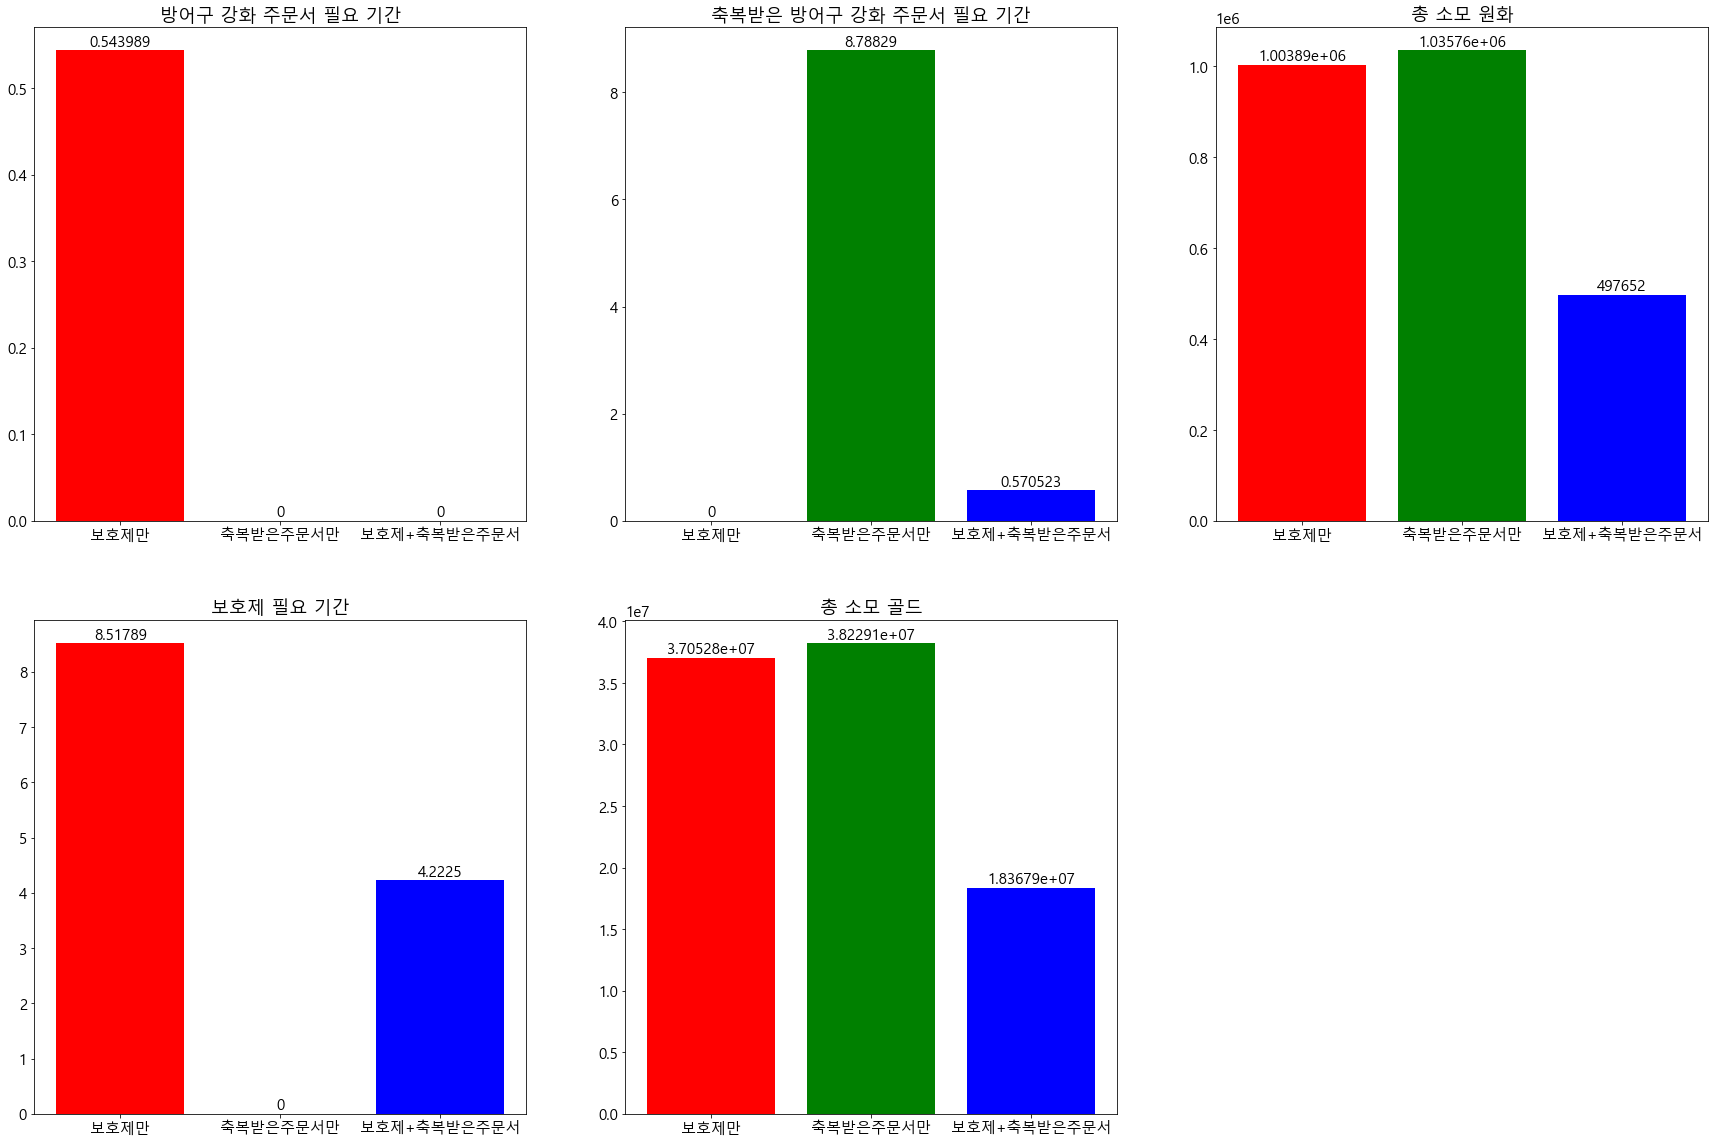

In [66]:
fig, axs = plt.subplots(2,3,figsize = (30,20))
시뮬레이션유형 = np.arange(3)
colors = ['r', 'g', 'b', 'm']
강화유형 = ["보호제만","축복받은주문서만","보호제+축복받은주문서"]
p1 = axs[0,0].bar(강화유형, df_goldPackageArmorDuration["방어구강화주문서필요일수"], color = colors)
axs[0,0].title.set_text("방어구 강화 주문서 필요 기간")
axs[0,0].bar_label(p1)
axs[0,0].set_xticks(시뮬레이션유형)
axs[0,0].set_xticklabels(강화유형)
p2 = axs[0,1].bar(강화유형, df_goldPackageArmorDuration["축복받은방어구강화주문서필요일수"], color = colors)
axs[0,1].bar_label(p2)
axs[0,1].title.set_text("축복받은 방어구 강화 주문서 필요 기간")
p3 = axs[1,0].bar(강화유형, df_goldPackageArmorDuration["보호제필요일수"], color = colors)
axs[1,0].bar_label(p3)
axs[1,0].title.set_text("보호제 필요 기간")
p4 = axs[1,1].bar(강화유형, df_goldPackageArmorDuration["소모골드"], color = colors)
axs[1,1].bar_label(p4)
axs[1,1].title.set_text("총 소모 골드")
p5 = axs[0,2].bar(강화유형, df_goldPackageArmorDuration["소모원화"], color = colors)
axs[0,2].bar_label(p5)
axs[0,2].title.set_text("총 소모 원화")
fig.delaxes(axs[1,2])

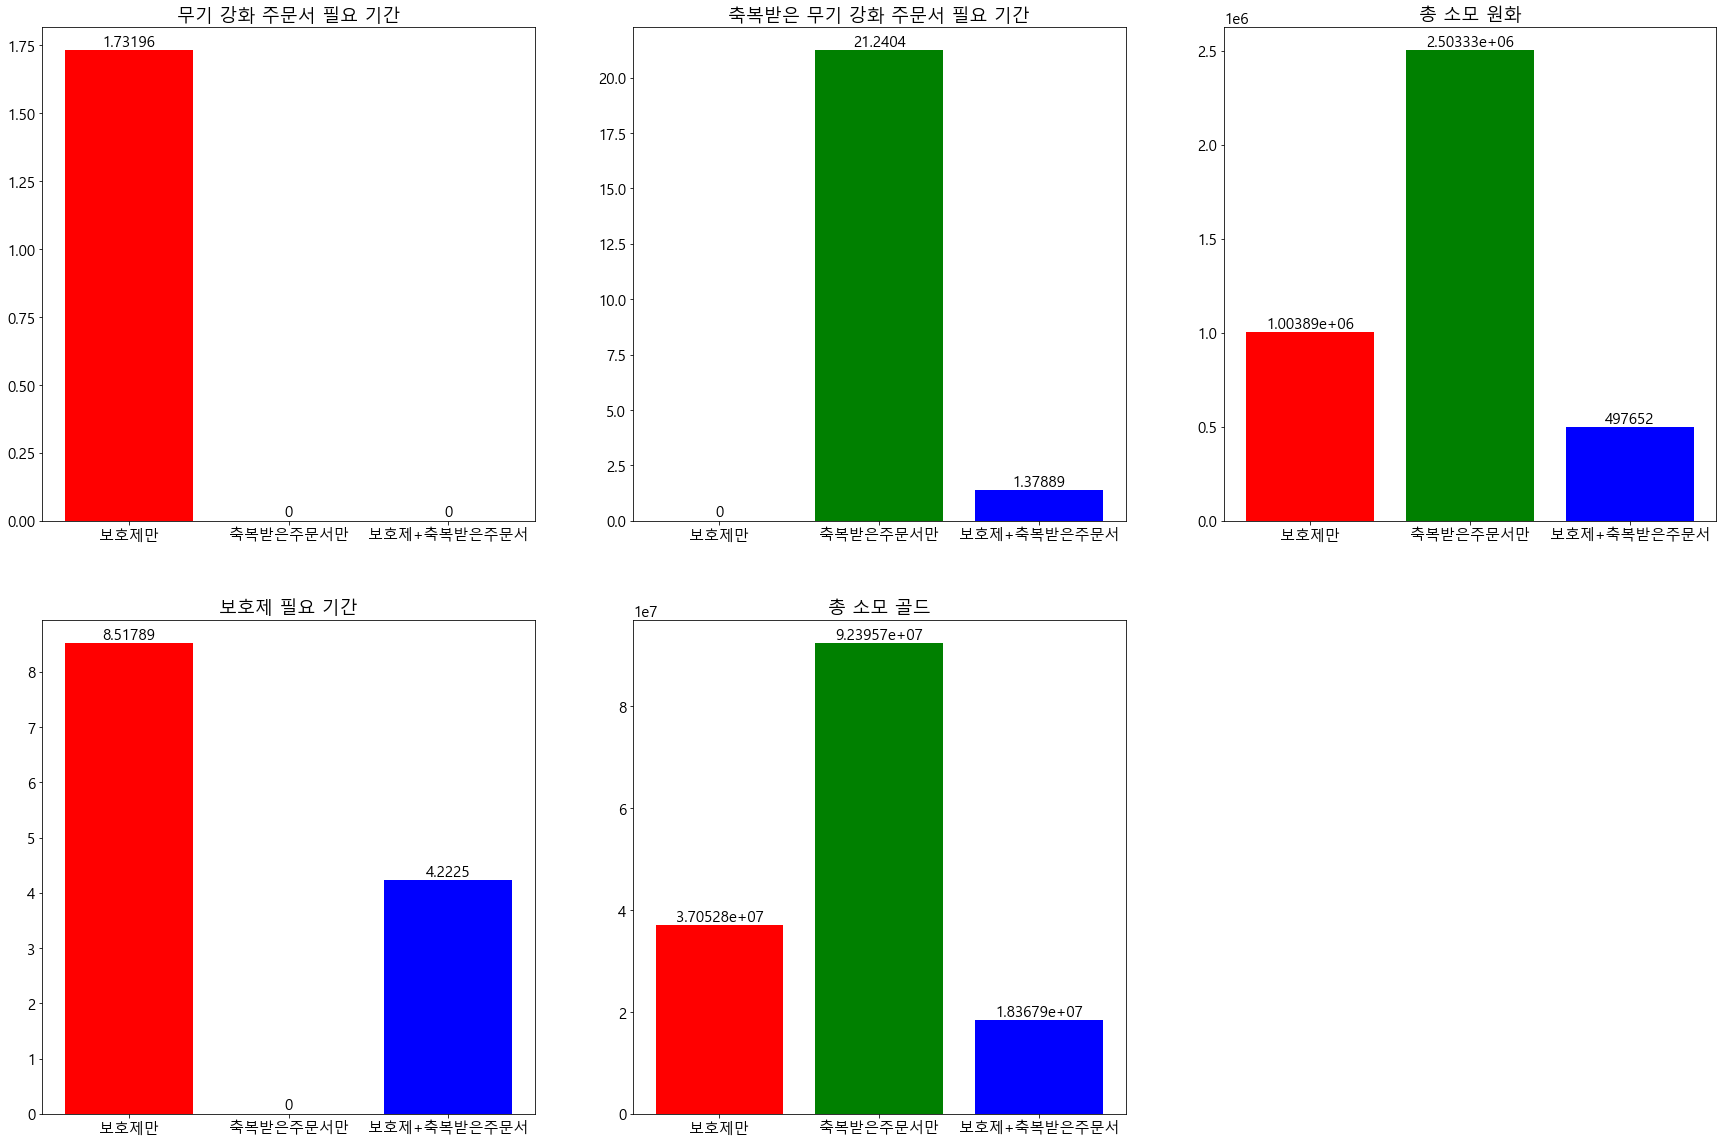

In [67]:
fig, axs = plt.subplots(2,3,figsize = (30,20))
시뮬레이션유형 = np.arange(3)
colors = ['r', 'g', 'b', 'm']
강화유형 = ["보호제만","축복받은주문서만","보호제+축복받은주문서"]
p1 = axs[0,0].bar(강화유형, df_goldPackageWeapDuration["무기강화주문서필요일수"], color = colors)
axs[0,0].title.set_text("무기 강화 주문서 필요 기간")
axs[0,0].bar_label(p1)
axs[0,0].set_xticks(시뮬레이션유형)
axs[0,0].set_xticklabels(강화유형)
p2 = axs[0,1].bar(강화유형, df_goldPackageWeapDuration["축복받은무기강화주문서필요일수"], color = colors)
axs[0,1].bar_label(p2)
axs[0,1].title.set_text("축복받은 무기 강화 주문서 필요 기간")
p3 = axs[1,0].bar(강화유형, df_goldPackageWeapDuration["보호제필요일수"], color = colors)
axs[1,0].bar_label(p3)
axs[1,0].title.set_text("보호제 필요 기간")
p4 = axs[1,1].bar(강화유형, df_goldPackageWeapDuration["소모골드"], color = colors)
axs[1,1].bar_label(p4)
axs[1,1].title.set_text("총 소모 골드")
p5 = axs[0,2].bar(강화유형, df_goldPackageWeapDuration["소모원화"], color = colors)
axs[0,2].bar_label(p5)
axs[0,2].title.set_text("총 소모 원화")
fig.delaxes(axs[1,2])